<a href="https://colab.research.google.com/github/khaireddine-satouri/TER-2022-2023/blob/main/Material_Behavior_Predection_V4_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
NUMBER_OF_OBSERVATIONS = 600  # Number of iterations to observe the progression of values
GRAIN = 10                    # the grain classes 
PHI1 = 104.3                 # First bunge angle
PSI = 92.0                    # Second bunge angle
PHI2 = 190.49                # Third bunge angle 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, learning_curve

In [ ]:
# Charger les données
df = pd.read_excel("Data_Sheet.xlsx", header=0)
df.head()

,Grain,Phi1 (°),Psi (°),Phi2 (°),h (nm),P (mN),x (µm),d (nm)
0,10,105.81,94.4,192.38,0.000000,0.000000,-2.390996,64.32688
1,10,105.81,94.4,192.38,1.817280,4.001145,-2.381237,64.46653
2,10,105.81,94.4,192.38,2.879298,9.905321,-2.371478,64.85121
3,10,105.81,94.4,192.38,4.122832,16.590043,-2.361719,65.14177
4,10,105.81,94.4,192.38,5.172039,22.889292,-2.351960,65.31030


In [ ]:
df.shape

(2977, 8)

In [ ]:
#df.duplicated().sum()

8

In [ ]:
#df=df.drop_duplicates()
#df.duplicated().sum()

0

In [ ]:
# Create an artificial time column by adding a sequence of integers representing the elapsed time since the start of the observation.
# Group data by Grain
grouped_data = df.groupby('Grain')
df['Time']=grouped_data.cumcount()
df['grain-Time'] = (df['Grain'].astype(str) + df['Time'].astype(str)).astype(int)

print(df['grain-Time'].head(595))

0        100
1        101
2        102
3        103
4        104
       ...  
590    10590
591    10591
592    10592
593      110
594      111
Name: grain-Time, Length: 595, dtype: int64


In [ ]:
X = df[['Phi1 (°)', 'Psi (°)', 'Phi2 (°)','Time', 'grain-Time']]
y = df[['h (nm)', 'P (mN)']]

# Training RFR model using learning curves and cross-validation

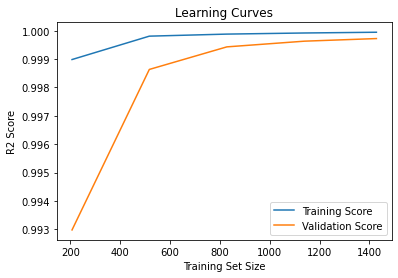

Score R2  0.9998704314946099


In [ ]:
# Randomize the data and set a constant random state for reproducibility
np.random.seed(666)
dataset = df.sample(frac=1).reset_index(drop=True)

# Splitting the data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

# Splitting the training set into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.20)

# Training the Random Forest Regressor with default parameters
rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)


# Plot learning curves to assess the sufficiency of the number of data points
train_sizes, train_scores, val_scores = learning_curve(
    rfr, X_train, y_train, train_sizes=np.array([ 207, 517, 828, 1139, 1428]), cv=5)

plt.plot(train_sizes, np.mean(train_scores, axis=1), label="Training Score")
plt.plot(train_sizes, np.mean(val_scores, axis=1), label="Validation Score")
plt.xlabel("Training Set Size")
plt.ylabel("R2 Score")
plt.legend()
plt.title("Learning Curves")
plt.show()

# Calculate feature importance
importances = rfr.feature_importances_

# Plot the feature importances in a bar plot


# Use the final model to predict on the test set and evaluate the accuracy
y_pred = rfr.predict(X_test)
r2_score = rfr.score(X_test, y_test)
print("Score R2 ",r2_score)




In [ ]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)


# 

In [ ]:
# Test the model on new values
observation_number = 600
grains_test=list(df["Grain"].unique())
PHI1_test=list(df["Phi1 (°)"].unique())
PSI_test=list(df["Psi (°)"].unique())
PHI2_test=list(df["Phi2 (°)"].unique())
print(PHI1_test)

[105.81, 3.89, 158.75, 0.04]


In [ ]:
observation_number = 600
test_classes = df[['Grain', 'Phi1 (°)', 'Psi (°)', 'Phi2 (°)']].drop_duplicates().values.tolist()

R2 Score of grain 10:  1.0


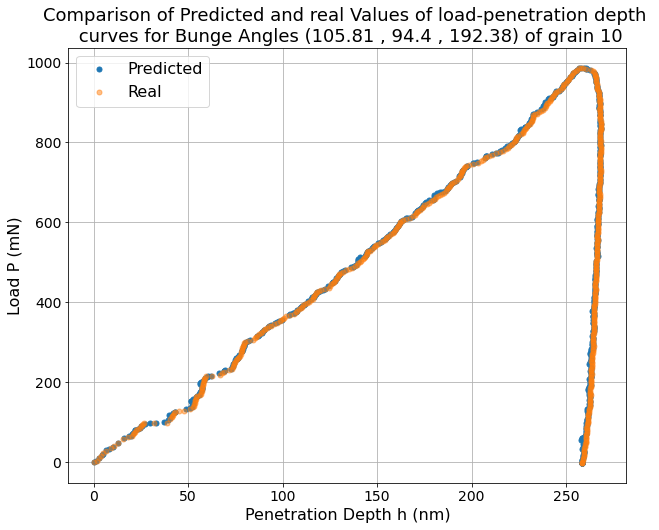

Predicted values [h (nm) P (mN)] of grain 10: 
 [[ 4.92129268e-02  1.92425056e-01]
 [ 1.07574364e+00  3.79083483e+00]
 [ 2.55332545e+00  1.06989573e+01]
 ...
 [ 2.58576069e+02 -9.18869876e-01]
 [ 2.58576069e+02 -9.18869876e-01]
 [ 2.58576069e+02 -9.18869876e-01]]
R2 Score of grain 11:  1.0


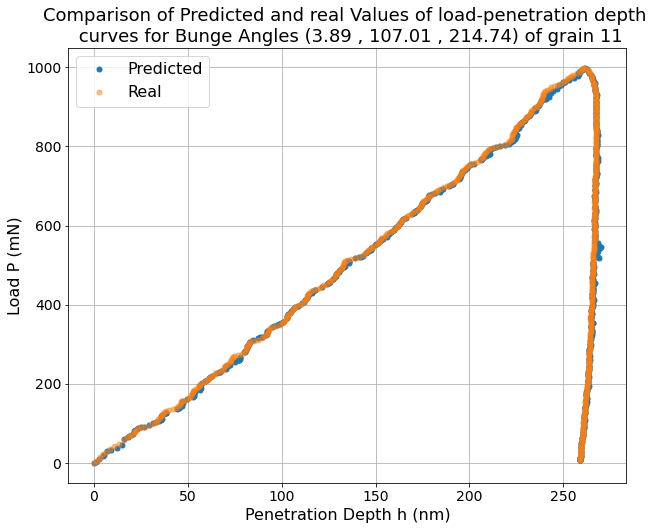

Predicted values [h (nm) P (mN)] of grain 11: 
 [[1.22971769e-01 4.02949625e-01]
 [1.14197228e+00 3.84010527e+00]
 [2.76509127e+00 1.01977150e+01]
 ...
 [2.58902965e+02 8.72792171e+00]
 [2.58902965e+02 8.72792171e+00]
 [2.58902965e+02 8.72792171e+00]]
R2 Score of grain 16:  1.0


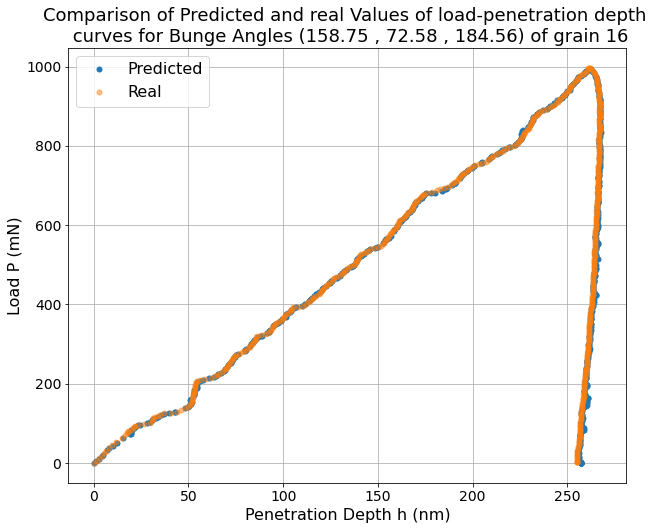

Predicted values [h (nm) P (mN)] of grain 16: 
 [[1.93833274e-01 7.07409663e-01]
 [1.23276251e+00 4.35778713e+00]
 [2.57982022e+00 1.09942747e+01]
 ...
 [2.57217999e+02 1.21301341e+00]
 [2.57217999e+02 1.21301341e+00]
 [2.57217999e+02 1.21301341e+00]]
R2 Score of grain 181:  1.0


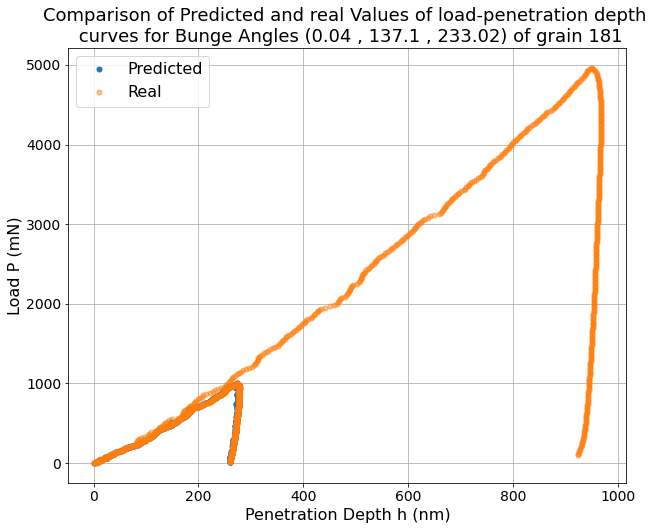

Predicted values [h (nm) P (mN)] of grain 181: 
 [[  0.41418229   1.41770158]
 [  1.61941188   5.31623892]
 [  4.15960397  10.05931711]
 ...
 [259.53419174   9.96297103]
 [259.53419174   9.96297103]
 [259.53419174   9.96297103]]
R2 Score of grain 185:  1.0


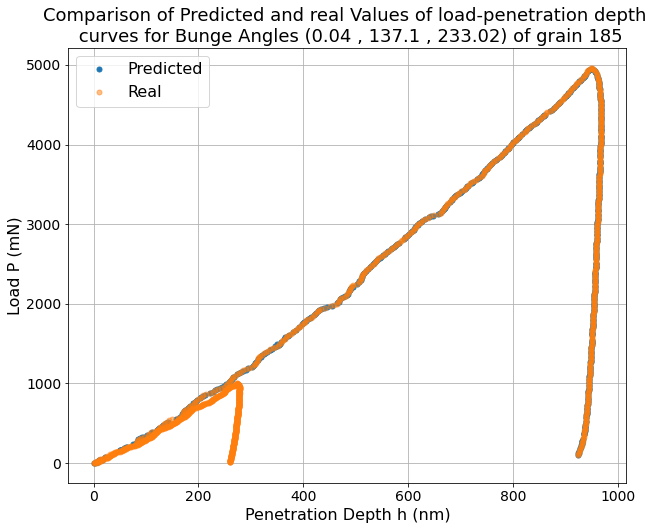

Predicted values [h (nm) P (mN)] of grain 185: 
 [[4.14182290e-01 1.41770158e+00]
 [1.72702694e+00 5.66182414e+00]
 [4.07275892e+00 1.12855151e+01]
 ...
 [9.25754272e+02 1.26672346e+02]
 [9.25389477e+02 1.20724526e+02]
 [9.23704384e+02 9.55968231e+01]]


In [ ]:
from itertools import product
for t in test_classes:
  #for t in i:   
    j_values = list(range(observation_number))
    #k_values = list(range(grain_observation_number_min, grain_observation_number_max + 1 ))
    X_new = np.array([[t[1], t[2], t[3], j_values[j], int(str(int(t[0]))+str(j))] for j in range(len(j_values))])
    y_pred = rfr.predict(X_new)
    r2_score = rfr.score(X_new, y_pred)
    print(f"R2 Score of grain {int(t[0])}: ",r2_score)
    # Get the actual values for comparison
    y_real = df.loc[(df['Phi1 (°)'] == t[1]) & (df['Psi (°)'] == t[2]) & (df['Phi2 (°)'] == t[3]) & (df['Time'] < observation_number) & (df['grain-Time'] < (df['Grain'].astype(str)+str(observation_number)).astype(int)), ['h (nm)', 'P (mN)']].values
    # Set plot parameters
    fig, ax = plt.subplots(figsize=(10, 8))
    ax.set_xlabel('Penetration Depth h (nm)', fontsize=16)
    ax.set_ylabel('Load P (mN)', fontsize=16)
    ax.set_title(f'Comparison of Predicted and real Values of load-penetration depth \n curves for Bunge Angles ({t[1]} , {t[2]} , {t[3]}) of grain {int(t[0])}', fontsize=18)
    ax.tick_params(axis='both', labelsize=14)
    ax.grid(True)

    # Plot the predicted and actual values
    ax.plot(y_pred[:, 0], y_pred[:, 1], '.', label='Predicted', markersize=10)
    ax.plot(y_real[:, 0], y_real[:, 1], '.', label='Real', markersize=10, alpha=0.5)
    ax.legend(fontsize=16, loc='upper left')

    plt.show()

    print(f"Predicted values [h (nm) P (mN)] of grain {int(t[0])}: \n",y_pred)

# Predict new observations from new data 

In [ ]:
X_new = np.array([[PHI1, PSI , PHI2, i , int(str(GRAIN)+str(i))] for i in range(NUMBER_OF_OBSERVATIONS)])
y_pred = rfr.predict(X_new)
print(y_pred)

[[ 4.92129268e-02  1.92425056e-01]
 [ 1.07574364e+00  3.79083483e+00]
 [ 2.55332545e+00  1.06989573e+01]
 ...
 [ 2.58576069e+02 -9.18869876e-01]
 [ 2.58576069e+02 -9.18869876e-01]
 [ 2.58576069e+02 -9.18869876e-01]]


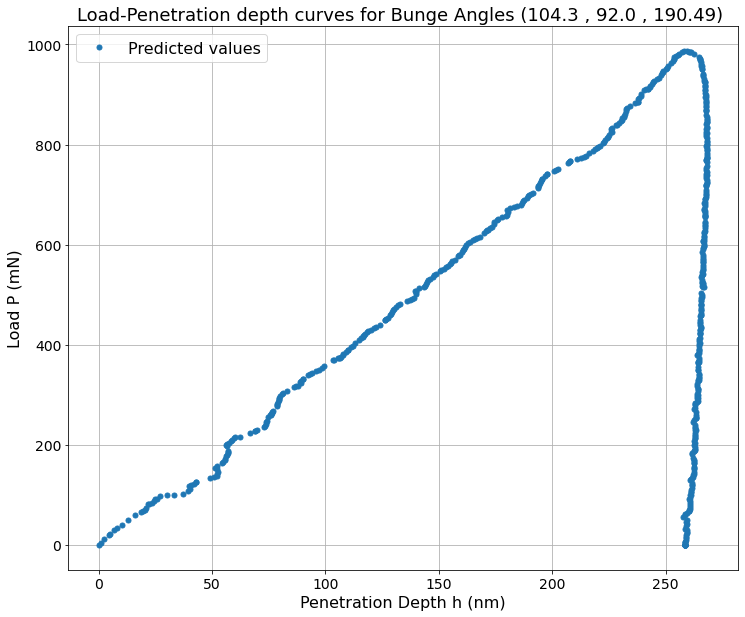

In [ ]:
# Set plot parameters
fig, ax = plt.subplots(figsize=(12, 10))
ax.set_xlabel('Penetration Depth h (nm)', fontsize=16)
ax.set_ylabel('Load P (mN)', fontsize=16)
ax.set_title(f'Load-Penetration depth curves for Bunge Angles ({PHI1} , {PSI} , {PHI2}) ', fontsize=18)
ax.tick_params(axis='both', labelsize=14)
ax.grid(True)

# Plot the relationship between P (mN) and h (nm) predicted values
ax.plot(y_pred[:, 0], y_pred[:, 1], '.', label='Predicted values', markersize=10)
ax.legend(fontsize=16, loc='upper left')

plt.show()
